# Search Algorithms

## Part 4 - Depth First Algorithm

Check our last graph solution via BFS. Or even earlier in tree solution. Yeah, stare at it for few seconds. 

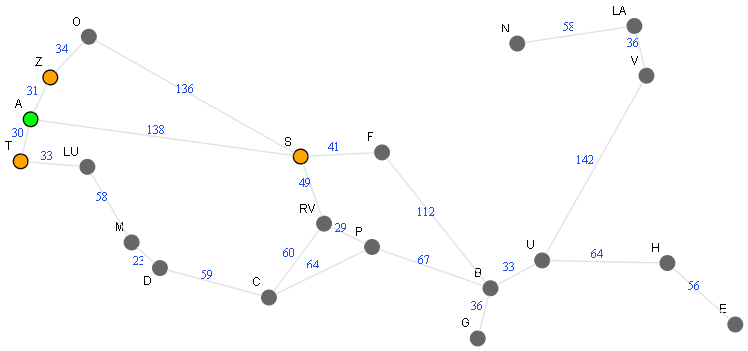

You might have wished, after assessing 'S', instead of going to 'T' or 'Z', if we could have moved further beyond 'S' to 'F' and so on? That way, wouldn't be faster? This is what we will try here.

We will choose a neighbor, check if its goal, else choose its neighbor, and so on. We will first try few iterations and then get in to code as earlier. Just like earlier bag analogy we used in our BFS tree solution earlier,..

### The very crux:

Just like BFS earlier, imagine we are at Arad (or node 'A'). 

1. Are we arleady at goal? No 'A' is not the goal. We need to make a move. 

2. We have 3 options to choose from for our next move. S, T, Z. Why? Because those are the only cities/nodes connected to A. We will choose one. Say, we chose 'S'. After our first move, we will have again two choices 'RV', 'F'. And so on from first step.

**Define our bag:**

The peculiar characteristic is that, you cannot pick up at random any letter from the bag. <font color=blue>What went last, comes out last</font>. Last In First Out, [LIFO](https://en.wikipedia.org/wiki/Stack_(abstract_data_type)). For example, in empty bag,  if you had first put 'Z', followed by 'T', followed by 'S', then when you pick up one, it would be 'S'. Let us say, taking the letter from the bag is called popping.

Note this is unlike BFS, where it was FIFO. Also, like FIFO resembling a queue in computing, LIFO resembles a stack in computing. Now think how a stack works, and you could see the principle in play.

_Disclaimer_: I will also engage in a dirty trick here. When we feed the neighbors in to the bag, we will feed in reverse alphabetical order (for eg, instead of feeding S,T,Z, I will feed, Z,T,S, so next time when I pop, S comes out, making our solution faster in this particular case of reaching B)

### Algorithm Development

Let us initialize as usual...hope you are now familiar with below constructs already from earlier sessions..
```
openSet = { 'A' }  
closedSet = ( 'A' )
cameFrom[ 'A' ] = None
```
Coding..

In [1]:
from collections import deque
from docHelpers_ipython import romania_location_map

cameFrom = { } 
openSet = deque()
M = romania_location_map

start = 'A'
goal = 'B'
openSet.append(start)  
cameFrom[start] = None
closedSet = set(start)              

**ITERATION 1** 
<pre>

Is openSet empty? No. So Go on.
Take first element from the openSet, in LIFO fashion: 'A'
Is 'A' the goal? No. So Go on.  

                              openSet : ( )  As 'A' is removed now
                            neighbors : ( 'Z' , 'T', 'S' )                      
                            closedSet : ( 'A' ) None of neighbors in closed Set. So process all.                       
                                                        
                              openSet : ( 'Z' , 'T', 'S' )
                            closedSet : ( 'A', 'Z' , 'T', 'S' ) 
                                                           
**Result:** openSet = { <font color="blue"><b> ( 'Z' , 'T', 'S' ) </b></font> }                                
</pre>
Note: ```cameFrom``` is not shown above as it could grow abnormally big to show here. Ok, I am lazy.
<hr>
Coding..

In [2]:
if openSet:
    
    current_node = openSet.pop()   # NOTE THIS CHANGE. EARLIER POPLEFT. NOW FOR FIFO. TAKE FIRST ELEMENT
    
    if current_node is not goal:     
        
        all_neighbors = reversed(M.get(current_node,[]).get('connections',[]))  # TAKING IN REVERSE ORDER
        for each_neighbor in all_neighbors:  # add neighbors    
            if each_neighbor not in closedSet:  # GRAPH: add to queue only if not already visited
                openSet.append(each_neighbor)                  
                cameFrom[each_neighbor] = current_node    
                closedSet.add(each_neighbor)
    
list(openSet)

['Z', 'T', 'S']

Visualizing..

In [3]:
from docHelpers_ipython import Doc
from IPython.core.display import HTML

doc = Doc(M)

resultHTML = doc.computeGraphs('A',['Z','T','S'], mappy=True, tree=True, queue=True, HTML=True)
HTML(resultHTML)

**ITERATION 2** 
<pre>

Is openSet empty? No. So Go on.
Take first element from the openSet, in LIFO fashion: 'S'
Is 'S' the goal? No. So Go on.  

                              openSet : ( 'Z' , 'T' )  As 'S' is removed now
                            neighbors : ( 'O' , 'RV' ,'F' )                      
                            closedSet : ( 'A', 'Z' , 'T', 'S' ) None of neighbors in closed Set. Process all.                                     
                              openSet : ( 'Z' , 'T', 'O', 'RV', 'F' )
                            closedSet : ( 'A', 'Z' , 'T', 'S', 'O', 'RV', 'F' ) 
                                                           
**Result:** openSet = { <font color="blue"><b> ( 'Z' , 'T', 'O', 'RV', 'F' ) </b></font> }                                
</pre>
<hr>

In [4]:
if openSet:
    
    current_node = openSet.pop()   # NOTE THIS CHANGE. EARLIER POPLEFT. NOW FOR FIFO. TAKE FIRST ELEMENT
    
    if current_node is not goal:     
        
        all_neighbors = reversed(M.get(current_node,[]).get('connections',[]))  # TAKING IN REVERSE ORDER
        for each_neighbor in all_neighbors:  # add neighbors    
            if each_neighbor not in closedSet:  # GRAPH: add to queue only if not already visited
                openSet.append(each_neighbor)                  
                cameFrom[each_neighbor] = current_node    
                closedSet.add(each_neighbor)
    
list(openSet)

['Z', 'T', 'O', 'RV', 'F']

In [5]:
resultHTML = doc.computeGraphs('S',['O', 'RV', 'F'], mappy=True, tree=True, queue=True, HTML=True)
HTML(resultHTML)

**ITERATION 3** 
<pre>

Is openSet empty? No. So Go on.
Take first element from the openSet, in LIFO fashion: 'F'
Is 'S' the goal? No. So Go on.  

                              openSet : ( 'Z', 'T', 'O', 'RV' )  
                            neighbors : ( 'B' )                      
                            closedSet : ( 'A', 'Z' , 'T', 'S', 'O', 'RV', 'F' ) 'B' is already not visited, so process
                            
                              openSet : ( 'Z' , 'T', 'O', 'RV', 'B' )
                            closedSet : ( 'A', 'Z' , 'T', 'S', 'O', 'RV', 'F', 'B' ) 
                                                           
**Result:** openSet = { <font color="blue"><b> ( 'Z' , 'T', 'O', 'RV', 'B' ) </b></font> }                                
</pre>
<hr>

In [6]:
if openSet:
    
    current_node = openSet.pop()   # NOTE THIS CHANGE. EARLIER POPLEFT. NOW FOR FIFO. TAKE FIRST ELEMENT
    
    if current_node is not goal:     
        
        all_neighbors = reversed(M.get(current_node,[]).get('connections',[]))  # TAKING IN REVERSE ORDER
        for each_neighbor in all_neighbors:  # add neighbors    
            if each_neighbor not in closedSet:  # GRAPH: add to queue only if not already visited
                openSet.append(each_neighbor)                  
                cameFrom[each_neighbor] = current_node    
                closedSet.add(each_neighbor)
    
list(openSet)

['Z', 'T', 'O', 'RV', 'B']

In [7]:
resultHTML = doc.computeGraphs('F',['B'], mappy=True, tree=True, queue=True, HTML=True)
HTML(resultHTML)

**ITERATION 4** 
<pre>

Is openSet empty? No. So Go on.
Take first element from the openSet, in LIFO fashion: 'B'
Is 'B' the goal? <font color="blue"><b>Yes, Success!</b></font>

                              openSet : ( 'Z', 'T', 'O', 'RV' )  
                                                           
**Result:** openSet = { <font color="blue"><b> ( 'Z' , 'T', 'O', 'RV' ) </b></font> }                                
</pre>
<hr>

In [8]:
if openSet:
    
    current_node = openSet.pop()   # NOTE THIS CHANGE. EARLIER POPLEFT. NOW FOR FIFO. TAKE FIRST ELEMENT
    
    if current_node is goal:
        print('Yes. Success.')
        
    else:        
        all_neighbors = reversed(M.get(current_node,[]).get('connections',[]))  # TAKING IN REVERSE ORDER
        for each_neighbor in all_neighbors:  # add neighbors    
            if each_neighbor not in closedSet:  # GRAPH: add to queue only if not already visited
                openSet.append(each_neighbor)                  
                cameFrom[each_neighbor] = current_node    
                closedSet.add(each_neighbor)
    
list(openSet)

Yes. Success.


['Z', 'T', 'O', 'RV']

In [9]:
resultHTML = doc.computeGraphs('B',[], mappy=True, tree=True, queue=True, HTML=True)
HTML(resultHTML)

We finished in 4 iterations, going deep. Note the green nodes in above diagram. This is thus called, <font color=blue>Depth First Search</font>. We take a neighbor, check and go after its neighbors first. 

One might also notice, this could be disadvantageous. What if we happen to choose a wrong route? Then we would have gone depth in that route come back all the way and taking correct route, thus ending up longer time. Thus with infinite graphs, DFS may never finish also. 

Food for thought. Try feeding alphabetically and see, how longer it takes.

### Coding:
One might also have noticed, the only thing we had to change programmatically was, instead of ```openSet.popleft()``` we used ```openSet.pop()```. Everything else was same as BFS. So we shall go ahead, wrap all in function, with this only change and check again. 

In [10]:
from collections import deque
from docHelpers_ipython import romania_location_map

cameFrom = { }  

def reconstructPath(current_node):
    Path = [current_node]
    while current_node is not None:
        current_node = cameFrom[current_node] 
        Path.append(current_node)
    return reversed(Path[:-1])   

def DFS(start, goal): 

    # INITIALIZATION
    openSet = deque()
    openSet.append(start)  
    cameFrom[start] = None
    closedSet = set(start)                
    
    # MAIN LOOP
    while openSet: 

        current_node = openSet.pop()    # ONLY CHANGE FOR DFS

        if current_node is goal:   
            print('Success. Route from {} to {} found. Path: {}'.format(start,goal,list(reconstructPath(current_node))))
            break
            
        all_neighbors = reversed(M.get(current_node,[]).get('connections',[])) # OK, A HACK HERE (OPTIONAL)
        for each_neighbor in all_neighbors:      
            if each_neighbor not in closedSet:  
                openSet.append(each_neighbor)                  
                cameFrom[each_neighbor] = current_node    
                closedSet.add(each_neighbor)
                
            
    return 'No Goal found!'
            
            
M = romania_location_map 
start = 'A'
goal = 'B'
result = DFS(start, goal)

Success. Route from A to B found. Path: ['A', 'S', 'F', 'B']


In [11]:
# one more test

start = 'S'
goal = 'N'
result = DFS(start, goal)

Success. Route from S to N found. Path: ['S', 'F', 'B', 'U', 'V', 'LA', 'N']


Voila! We did it again. It worked.  We just created a DFS algorithm also for graphs!  
<img style="float: left;" src='https://m.popkey.co/4e3e0f/NOq4_f-maxage-0.gif'>

## Visualization (Optional)

We will inject a small code to keep track of bag contents, nodes traversed for sake of visualization. And then render an animation to visualize how nodes were traversed to reach the goal. 

Success. Route from A to B found. Path: ['A', 'S', 'F', 'B']


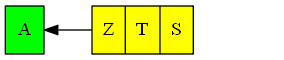

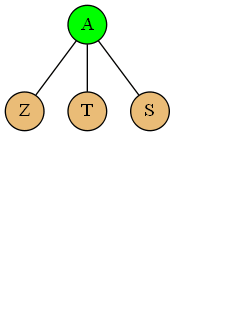

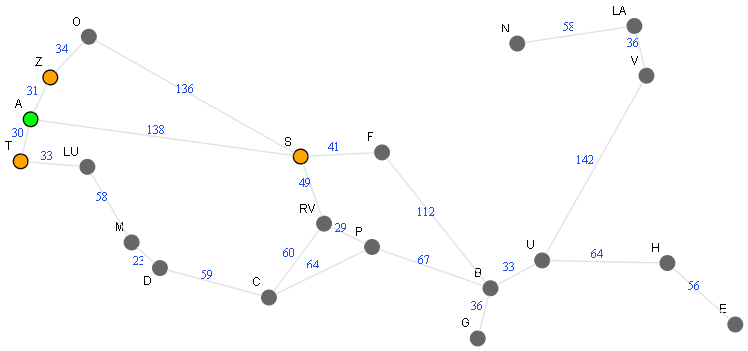

In [12]:
from collections import deque
from docHelpers_ipython import Doc 

# VISUALIZATION PURPOSE
from IPython.display import display, Image

cameFrom = { }  # This has to be globally accessible for reconstructPath to 

def reconstructPath(current_node):
    Path = [current_node]
    while current_node is not None:
        current_node = cameFrom[current_node] # Now current node would become 'A'
        Path.append(current_node)
    return reversed(Path[:-1]) # trimming    

def DFS(start, goal): 

    # INITIALIZATION
    openSet = deque()
    openSet.append(start)  
    cameFrom[start] = None
    closedSet = set(start)   # GRAPH: we never get to add 'start' in closed set once in main loop, so we do now!             
    
    # MAIN LOOP
    while openSet: #eventual failure exit

        current_node = openSet.pop()    # FIFO 

        if current_node is goal:   # successful exit
            print('Success. Route from {} to {} found. Path: {}'.format(start,goal,list(reconstructPath(current_node))))
            break
            
        # VISUALIZATION PURPOSE
        all_neighbors = reversed(M.get(current_node,[]).get('connections',[]))        
        considered_neighbors = list(set(all_neighbors) - set(closedSet)) # thank you: https://stackoverflow.com/questions/3462143/get-difference-between-two-lists
        
        for each_neighbor in reversed(M.get(current_node,[]).get('connections',[])):  # add neighbors                
            if each_neighbor not in closedSet:  # GRAPH: add to queue only if not already visited
                openSet.append(each_neighbor)                  
                cameFrom[each_neighbor] = current_node    
                closedSet.add(each_neighbor)
                
        # VISUALIZATION PURPOSE
        _ = doc.computeGraphs(current_node, considered_neighbors)
            
    # VISUALIZATION PURPOSE     
    _ = doc.computeGraphs(current_node, [])
    return 'No Goal found!'
            
            
M = romania_location_map 
start = 'A'
goal = 'B'

# VISUALIZATION PURPOSE - called here caz we use doc in ourSearchAlgo
doc = Doc(M) 

result = DFS(start, goal)

# VISUALIZATION PURPOSE
images = doc.render()
display(Image(images[0]),Image(images[1]),Image(images[2]))

### BFS vs DFS Visual Comparison:

Take a moment to compare the BFS and DFS traversal, we just finished. 

<div style='display:flex;'>
    <div>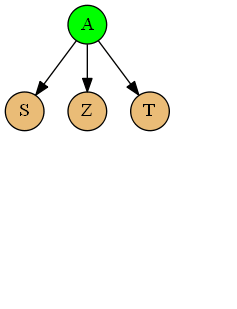</div><pre>    </pre>
    <div>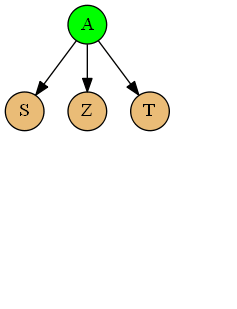</div>
</div>

<div style='display:flex'>
    <div>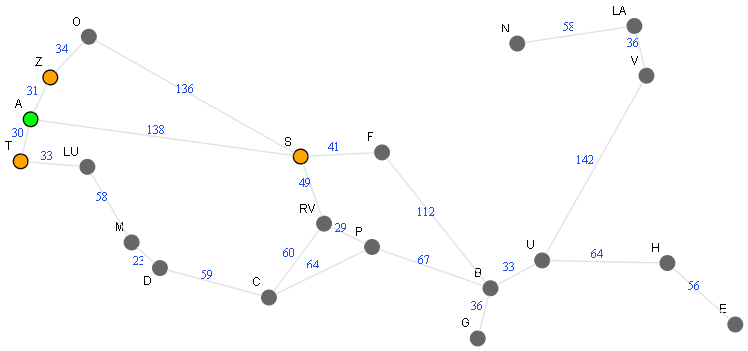</div><pre>    </pre>
    <div>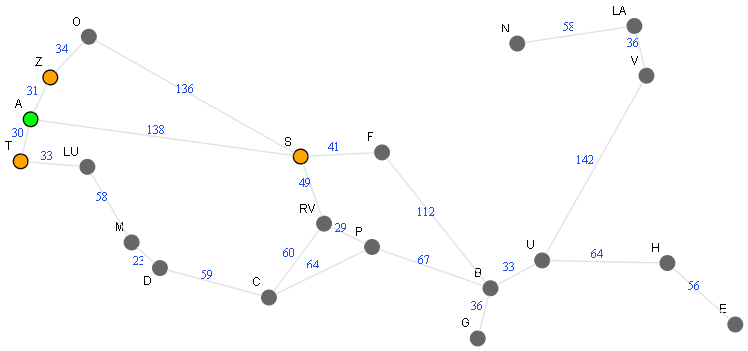</div>
</div>

BFS goes layer by layer, whereas DFS goes depth in one direction, come back, goes into another and so on. 